In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import kagglehub
import os

In [11]:
data_folder = './OurData/'
movie_data = pd.read_csv(data_folder+'clean_data_original.csv')
budget_data = pd.read_csv(data_folder+'movie_data_tmbd.csv', sep='|', engine='python')


movie_data.shape

FileNotFoundError: [Errno 2] No such file or directory: './OurData/movie_data_tmbd.csv'

In [ ]:
#remove the lines where the budget is equal to 0 and nan because it means for both that we don't have an information on the budget
budget_data['budget'] = pd.to_numeric(budget_data['budget'], errors='coerce')

budget_data_clean = budget_data[budget_data['budget'].notna() & (budget_data['budget'] != 0)]
budget_data_clean = budget_data_clean.drop_duplicates(subset='imdb_id')
budget_data_clean.shape

(14074, 27)

: 

In [ ]:
# now merging the two data sets

movie_data.rename(columns={'Runtime':'runtime'}, inplace=True)

merged_data_budget = movie_data.merge(budget_data_clean[['title', 'runtime', 'budget']], 
                               on=['title', 'runtime'], 
                               how='inner')

merged_data_budget.shape
merged_data_budget.head(5)

(3519, 13)

: 

In [ ]:
imdb_data = pd.read_csv(data_folder+'clean_data_imdb.csv')

imdb_data.rename(columns={'BoxOfficeRevenue':'BoxOfficeRevenueImdb'}, inplace=True)

#merge the imdb data with the merged data and only add the colum BoxofficerevenueImdb and the column ratingStandardize to the merged data
imdb_data.rename(columns={'Runtime':'runtime'}, inplace=True)



merged_data_imdb = merged_data_budget.merge(imdb_data[['title', 'BoxOfficeRevenueImdb', 'RatingStandardize', 'runtime']],
                       on=['title','runtime'], 
                       how='inner')

merged_data_imdb.shape

(3031, 15)

: 

In [ ]:
merged_data_imdb_clean = merged_data_imdb[merged_data_imdb['BoxOfficeRevenueImdb'].notna() | merged_data_imdb['BoxOfficeRevenue'].notna()]

# now for all the lines where there is a value for BoxOfficeRevenueImdb and not for BoxOfficeRevenue we will copy the value from BoxOfficeRevenueImdb to BoxOfficeRevenue and vice versa

merged_data_imdb_clean['BoxOfficeRevenue'] = merged_data_imdb_clean['BoxOfficeRevenue'].fillna(merged_data_imdb_clean['BoxOfficeRevenueImdb'])
merged_data_imdb_clean['BoxOfficeRevenueImdb'] = merged_data_imdb_clean['BoxOfficeRevenueImdb'].fillna(merged_data_imdb_clean['BoxOfficeRevenue'])

# now for all the lines where there is a value for BoxOfficeRevenueImdb and for BoxOfficeRevenue we will calculate the difference in percentage between the two values and put it in a new column called BoxOfficeRevenueDifference
def percentage_difference(X, Y):                                           

    return np.abs((X-Y))/np.maximum(X,Y) * 100

merged_data_imdb_clean['BoxOfficeRevenueDifference'] = percentage_difference(merged_data_imdb_clean['BoxOfficeRevenue'], merged_data_imdb_clean['BoxOfficeRevenueImdb'])

# print the mean of the BoxOfficeRevenueDifference column

print(merged_data_imdb_clean['BoxOfficeRevenueDifference'].mean())


merged_data_imdb_clean.sample(5)

0.08997550131860477


C:\Users\mehdi\AppData\Local\Temp\ipykernel_31656\2059975187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_imdb_clean['BoxOfficeRevenue'] = merged_data_imdb_clean['BoxOfficeRevenue'].fillna(merged_data_imdb_clean['BoxOfficeRevenueImdb'])
C:\Users\mehdi\AppData\Local\Temp\ipykernel_31656\2059975187.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_imdb_clean['BoxOfficeRevenueImdb'] = merged_data_imdb_clean['BoxOfficeRevenueImdb'].fillna(merged_data_imdb_clean['BoxOfficeRevenue

,Unnamed: 0,Wiki_ID,Movie_ID,title,release_date,BoxOfficeRevenue,runtime,Languages,Countries,Genres,Year,BoxOfficeStandardize,budget,BoxOfficeRevenueImdb,RatingStandardize,BoxOfficeRevenueDifference
2394,64280,2390149,/m/078m6t,Corky Romano,2001,23900000.0,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/0gw5w78"": ""G...",2001.0,0.008587,11000000.0,23900000.0,0.47,0.0
1261,33668,66853,/m/0hmm7,The Conversation,1974-04-07,4420000.0,113.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/02n4kr"": ""Myster...",1974.0,0.001585,1600000.0,4420000.0,0.77,0.0
1494,40713,58018,/m/0fxb2,Tora! Tora! Tora!,1970,29548291.0,144.0,"{""/m/03_9r"": ""Japanese Language"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0gw5n2f"": ""Japanese Movies"", ""/m/02p0szs""...",1970.0,0.010617,25485000.0,29548291.0,0.75,0.0
2755,74174,4836948,/m/0cq8nx,Mrs. Miniver,1942-06-04,8878000.0,134.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/05swd"": ""Propaganda film"", ""/m/02h8pkk"": ...",1942.0,0.003187,1344000.0,8878000.0,0.76,0.0
1090,29072,452767,/m/02vzxsf,Underworld,2003-09-19,95708457.0,121.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""...",2003.0,0.034396,22000000.0,95708457.0,0.70,0.0


: 

In [ ]:
merged_data_imdb_clean = merged_data_imdb_clean.drop_duplicates(subset='Wiki_ID')

merged_data_imdb_clean.shape


(1904, 16)

: 

# Part 2

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [8]:
data_folder = 'OurData/'
all_metrics = pd.read_csv(data_folder+'all_metrics.csv')
all_metrics = all_metrics.dropna(subset=['SuccessMetric'])
all_metrics.head()

,Unnamed: 0,Wiki_ID,Movie_ID,title,Runtime,Languages,Countries,Genres,Year,Net_revenue,rating,SuccessMetric,script_id,imdb_id,Bechdel_score,ratio_W/M,incl_score
0,233,103021,/m/0p_sc,Midnight Express,121.0,"{""/m/064_8sq"": ""French Language"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/0hn10"": ""LGBT"", ...",1978,32700000.0,7.550000,0.773523,1155,tt0077928,0,0.083333,0.045285
1,298,5549065,/m/0ds11z,Sweeney Todd: The Demon Barber of Fleet Street,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0lsxr"": ""Crime Fiction"", ""/m/0fx2s"": ""Tra...",2007,102523164.0,7.150000,0.822595,5083,tt0408236,1,0.230769,0.307803
2,346,1033297,/m/0401sg,Resident Evil,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2002,69441078.0,6.500000,0.665816,3204,tt0120804,3,0.400000,0.598319
3,555,30548208,/m/0g9wdmc,The Iron Lady,104.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0f8l9c"": ""France"", ""/m/07ssc"": ""United Ki...","{""/m/017fp"": ""Biography"", ""/m/07s9rl0"": ""Drama""}",2011,101943631.0,6.300000,0.656896,2634,tt1007029,3,0.666667,0.770197
4,562,1964091,/m/069dl1,Next,95.0,"{""/m/064_8sq"": ""French Language"", ""/m/04306rv""...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2007,6066841.0,6.050048,0.400119,1190,tt0435705,2,0.166667,0.425755


In [3]:
X = all_metrics.drop(columns=["incl_score", "Unnamed: 0", "Wiki_ID", "title", "script_id", "imdb_id", "Movie_ID","Bechdel_score","ratio_W/M","Countries","Languages","Genres"])
y = all_metrics["incl_score"]

In [15]:
# categoricals
#X = pd.get_dummies(X, columns=["Languages", "Countries", "Genres"], drop_first=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialisation
model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Training
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [5]:
# Prediction
y_pred = model.predict(X_test)

# performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.03196004861452889


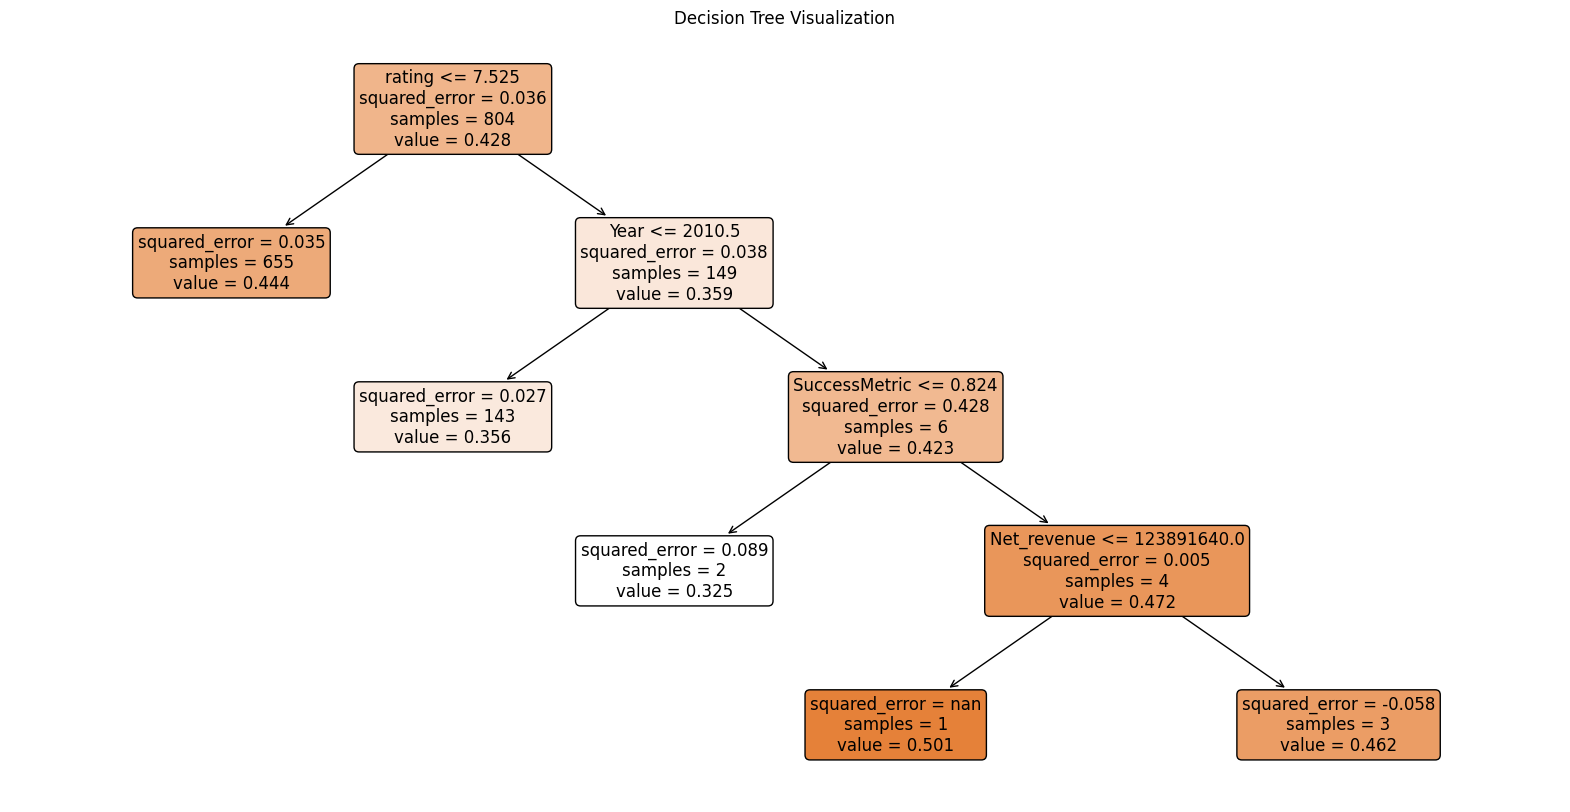

In [6]:
# Visualize the decision tree

plt.figure(figsize=(20, 10))  
plot_tree(
    model,
    feature_names=list(X.columns),  
    filled=True,  
    rounded=True,  
    fontsize=12  
)
plt.title("Decision Tree Visualization")
plt.show()



In [9]:

X2 = all_metrics.drop(columns=["SuccessMetric", "Unnamed: 0", "Wiki_ID", "title", "script_id", "imdb_id", "Movie_ID","rating","Net_revenue","Countries","Languages","Genres"])
y2 = all_metrics["SuccessMetric"]

#X2 = pd.get_dummies(X2, columns=["Languages", "Countries", "Genres"], drop_first=True)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = DecisionTreeRegressor(max_depth=5, random_state=42)

model2.fit(X2_train, y2_train)




DecisionTreeRegressor(max_depth=5, random_state=42)

In [10]:
y2_pred = model2.predict(X2_test)

mse = mean_squared_error(y2_test, y2_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.04374600216426307


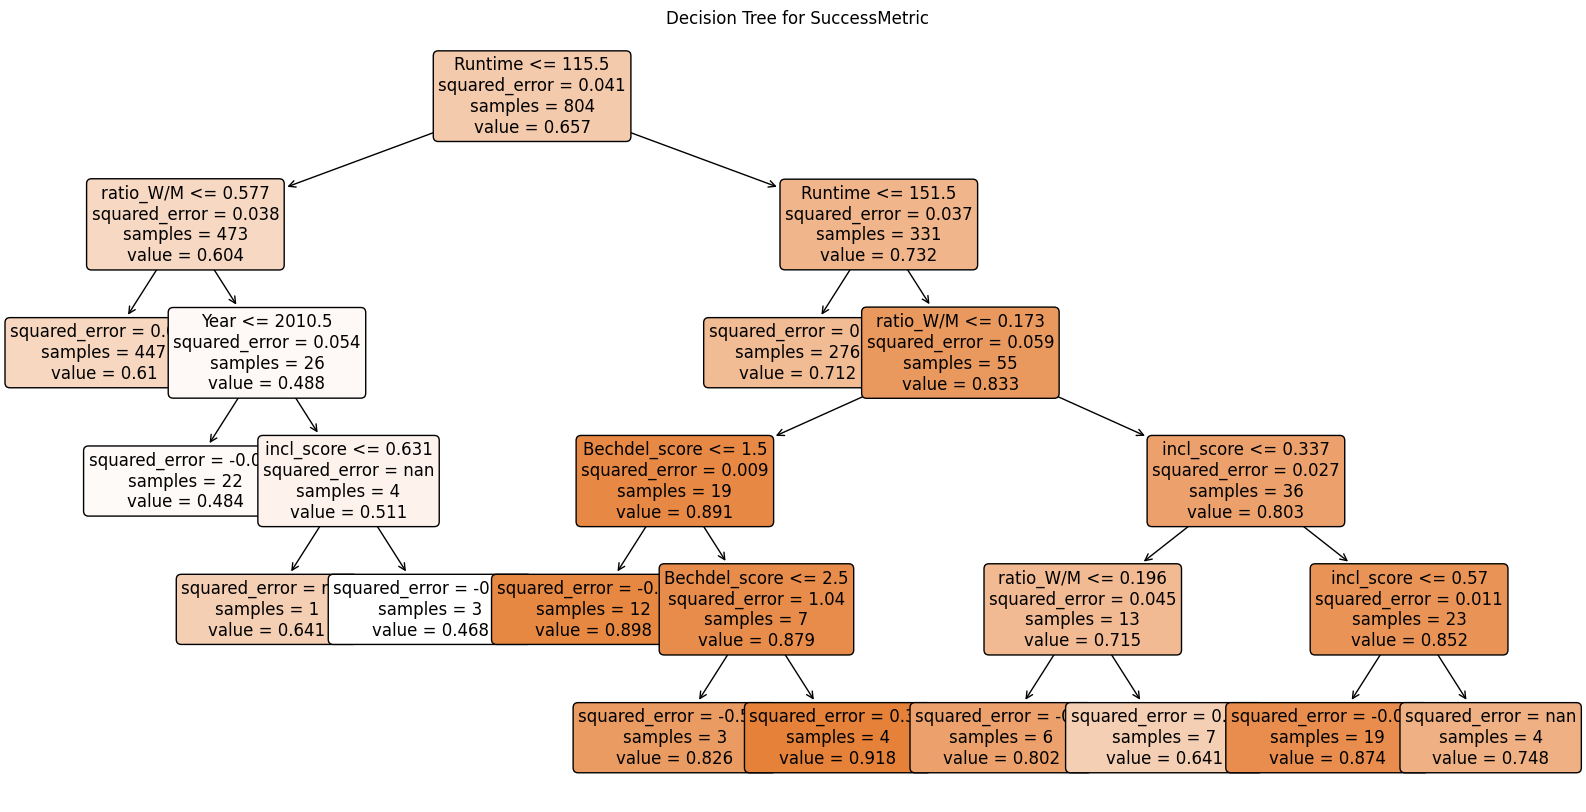

In [11]:
plt.figure(figsize=(20, 10))
plot_tree(
    model2,
    feature_names=list(X2.columns),
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree for SuccessMetric")
plt.show()


In [2]:
import plotly.graph_objects as go

# Define node labels with success metric values
labels = [
    "Runtime <= 115.5\n(Score = 0.657)",         
    "proportion_actress <= 0.577\n(Score = 0.604)",           
    "Year <= 2010.5\n(Score = 0.488)",                
    "incl_score <= 0.631\n(Score = 0.511)",           
    "Runtime > 115.5\n(Score = 0.732)",               
    "Runtime <= 151.5\n(Score = 0.712)",              
    "proportion_actress <= 0.173\n(Score = 0.833)",            
    "incl_score <= 0.337\n(Score = 0.803)",           
    "Bechdel_score <= 1.5\n(Score = 0.891)",          
    "Bechdel_score <= 2.5\n(Score = 0.879)",          
    "incl_score <= 0.57\n(Score = 0.852)",            
]

# Custom data for success metric values
customdata = [
    0.657, 0.604, 0.488, 0.511, 0.732, 0.712, 0.833, 0.803, 0.891, 0.879, 0.852
]

# Define links (Source → Target with Sample Count)
sources = [
    0, 0,         # Root splits
    1, 1,         # ratio_W/M splits
    2, 2,         # Year splits
    3, 3,         # incl_score splits
    4, 4,         # Runtime > 115.5 splits
    5, 5,         # Runtime <= 151.5 splits
    6, 6,         # ratio_W/M <= 0.173 splits
    7, 7,         # incl_score <= 0.337 splits
    8, 8,         # Bechdel_score <= 1.5 splits
    9, 9,         # Bechdel_score <= 2.5 splits
    10, 10        # incl_score <= 0.57 splits
]

targets = [
    1, 4,         # Root splits to ratio_W/M and Runtime > 115.5
    2, 5,         # ratio_W/M splits to Year and Runtime <= 151.5
    3, 6,         # Year splits to incl_score and ratio_W/M <= 0.173
    6, 7,         # incl_score splits to ratio_W/M <= 0.173 and incl_score <= 0.337
    7, 8,         # Runtime > 115.5 splits to Bechdel_score <= 1.5
    8, 9,         # Runtime <= 151.5 splits to Bechdel_score <= 2.5
    9, 10,        # ratio_W/M <= 0.173 splits to incl_score <= 0.57
    10, 3         # incl_score <= 0.337 splits back to incl_score
]

values = [
    804, 473,     # Root sample counts
    447, 331,     # ratio_W/M sample counts
    276, 55,      # Year sample counts
    36, 19,       # incl_score sample counts
    19, 7,        # Runtime > 115.5 sample counts
    7, 4,         # Runtime <= 151.5 sample counts
    4, 23,        # ratio_W/M sample counts
    23, 4         # incl_score sample counts
]

# Create Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        customdata=customdata,
        hovertemplate='Node: %{label}<br>Success Metric: %{customdata:.3f}<extra></extra>',  # Hover template
        color="lightblue"  # Node colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color="rgba(192, 192, 192, 0.4)"  # Link colors
    )
)])

# Update layout
fig.update_layout(
    title_text="Sankey Diagram of the Success Metric",
    font_size=12
)

# Display the diagram
fig.show()
